In [31]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import re, nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df =pd.read_csv('C:\\Users\\jayas\\Downloads\\AirlineReviews.csv\\AirlineReviews.csv')
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [33]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id'],
      dtype='object')

In [34]:
df.shape

(129455, 22)

In [35]:
df.isnull().sum()

Aircraft               93031
AirlineName                0
CabinType               3018
DateFlown              38462
DatePub                    0
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OriginCountry           1678
OverallScore            4331
Recommended                0
Review                   824
Route                  38630
SeatComfortRating          0
ServiceRating              0
Slug                       0
Title                      4
TravelType             38309
TripVerified           69947
ValueRating                0
WifiRating                 0
unique_id                  0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EntertainmentRating,129455.0,1.557190,1.751076,0.0,0.0,1.0,3.0,5.0
FoodRating,129455.0,1.989077,1.774512,0.0,0.0,1.0,4.0,5.0
GroundServiceRating,129455.0,1.652010,1.740252,0.0,0.0,1.0,3.0,5.0
OverallScore,125124.0,4.556408,3.498833,1.0,1.0,3.0,8.0,10.0
SeatComfortRating,129455.0,2.470202,1.620262,0.0,1.0,2.0,4.0,5.0
ServiceRating,129455.0,2.689622,1.774499,0.0,1.0,3.0,4.0,5.0
ValueRating,129455.0,2.637527,1.628808,0.0,1.0,2.0,4.0,5.0
WifiRating,129455.0,0.453926,1.078274,0.0,0.0,0.0,0.0,5.0


In [38]:
df.CabinType.unique()

array(['Economy Class', nan, 'Business Class', 'First Class',
       'Premium Economy'], dtype=object)

In [39]:
df.Recommended.unique()

array(['yes', 'no'], dtype=object)

In [40]:
df.TravelType.unique()

array(['Solo Leisure', nan, 'Business', 'Couple Leisure',
       'Family Leisure'], dtype=object)

In [41]:
df['Recommended'].nunique()

2

In [42]:
# Extract month and year from 'DatePub' column
df['MonthYearPublished'] = pd.to_datetime(df['DatePub']).dt.to_period('M')

# Convert 'MonthYearPublished' to numeric representation
df['MonthYearPublished'] = df['MonthYearPublished'].dt.year.astype(str) + df['MonthYearPublished'].dt.month.astype(str).str.zfill(2)

# Convert 'MonthYearPublished' column to numeric type
df['MonthYearPublished'] = pd.to_numeric(df['MonthYearPublished'], errors='coerce')

# Print the updated column
print(df['MonthYearPublished'])


0         201911
1         201906
2         201906
3         201012
4         201011
           ...  
129450    201007
129451    201006
129452    201006
129453    201006
129454    201006
Name: MonthYearPublished, Length: 129455, dtype: int64


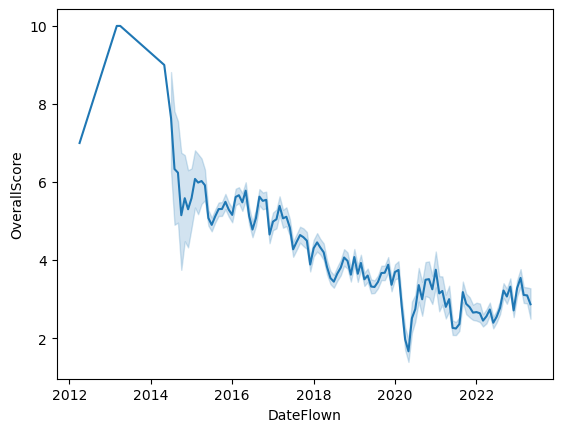

In [43]:
df['DateFlown'] = pd.to_datetime(df['DateFlown'])
df['DatePub'] = pd.to_datetime(df['DatePub'])

sns.lineplot(data=df, x='DateFlown', y='OverallScore')
plt.show()

In [44]:
example = df['Review'].iloc[1]
example

'Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.'

In [53]:
def clean_the_tweet(text):
    try:
        # Check if text is a string or can be converted to a string
        text = str(text)
        tokens = nltk.word_tokenize(re.sub("[^a-zA-Z]", " ", text))    #tokenizes text; re.sub replaces non-textual chars
        tokens = [token.lower() for token in tokens]                   #uniform text
        return ' '.join(tokens[:])                                    # join to a single string
    except Exception as e:
        print(f"Error cleaning tweet: {e}")
        return ''
    
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def text_process(msg):
    nopunc = [char for char in msg if char not in string.punctuation]       ##List comprehension to remove punctuations
    nopunc = ''.join(nopunc)                                          #Joins characters in nopunc to make string w/o punctuation
    
    # Using scikit-learn's English stopwords
    stop_words = set(ENGLISH_STOP_WORDS)                             #creates a set of eng stopwords 

    return ' '.join([word for word in nopunc.split() if word.lower() not in stop_words])

In [54]:
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
ct=clean_the_tweet(example)
ct

'moroni to anjouan it is a very small airline my ticket advised me to turn up at hrs which i did there was confusion at this small airport i was then directed to the office of ab aviation which was still closed it opened at hrs and i was told that the flight had been put back to hrs and that they had tried to contact me this could not be true as they did not have my phone number i was with a local guide and he had not been informed either i presume that i was bumped off the later flight did operate but as usual there was confusion at check in the flight was only mins and there were no further problems not a good airline but it is the only one for comoros'

In [58]:
text_process(ct)

'moroni anjouan small airline ticket advised turn hrs did confusion small airport directed office ab aviation closed opened hrs told flight hrs tried contact true did phone number local guide informed presume bumped later flight did operate usual confusion check flight mins problems good airline comoros'

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initializing the VADER sentiment analyzer
nltk.download('vader_lexicon')  # Download the VADER lexicon
sia = SentimentIntensityAnalyzer()

# Initializing lists to store sentiment labels and scores
sentiment_labels = []          
sentiment_scores = []          

# Processing each review and perform sentiment analysis
for review in df['Review'].dropna():  
    # cleaning and processing
    cleaned_tweet = clean_the_tweet(review)
    cleaned_text = text_process(cleaned_tweet)
    
    # Calculating sentiment score
    sentiment_score = sia.polarity_scores(cleaned_text)['compound']   #compound score is used representing overall
    
    # Determining sentiment label based on sentiment score
    sentiment_label = 'Positive' if sentiment_score > 0.05 else 'Negative' if sentiment_score < -0.05 else 'Neutral'
    
    # Appending results to lists
    sentiment_labels.append(sentiment_label)
    sentiment_scores.append(sentiment_score)

# Creating a new DataFrame with the sentiment analysis results
sentiment_df = pd.DataFrame({
    'Review': df['Review'].dropna(),
    'Sentiment_Label': sentiment_labels,
    'Sentiment_Score': sentiment_scores
})

# Printing the sentiment analysis results for the first 4 reviews
print("Sentiment Analysis Results:")
print(sentiment_df[['Review', 'Sentiment_Label', 'Sentiment_Score']].head(4))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Results:
                                              Review Sentiment_Label  \
0  Moroni to Moheli. Turned out to be a pretty de...        Positive   
1  Moroni to Anjouan. It is a very small airline....         Neutral   
2  Anjouan to Dzaoudzi. A very small airline and ...        Positive   
3  Havana - Cayo Coco return. A one hour flight w...        Positive   

   Sentiment_Score  
0           0.8750  
1          -0.0258  
2           0.8122  
3           0.8885  


In [61]:
sentiment_df['Sentiment_Label'].value_counts()

Positive    77446
Negative    48853
Neutral      2332
Name: Sentiment_Label, dtype: int64

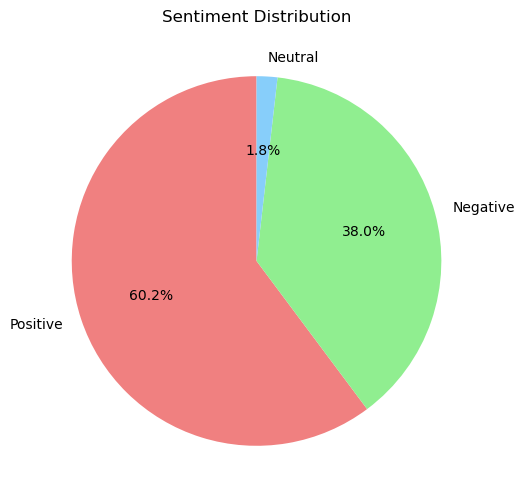

In [62]:
plt.figure(figsize=(6, 6))
sentiment_df['Sentiment_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

C:\Users\jayas\AppData\Local\Temp\ipykernel_17624\1914590820.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


array([[<Axes: title={'center': 'Sentiment_Score'}>]], dtype=object)

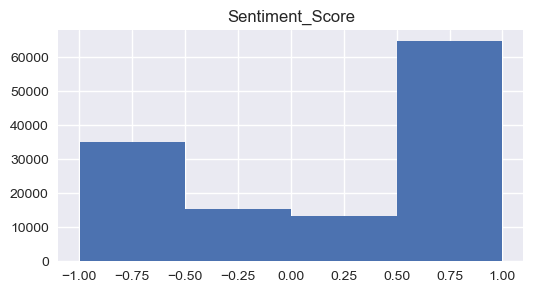

In [63]:
plt.style.use("seaborn")
sentiment_df.hist(figsize=(6,3), bins=4)

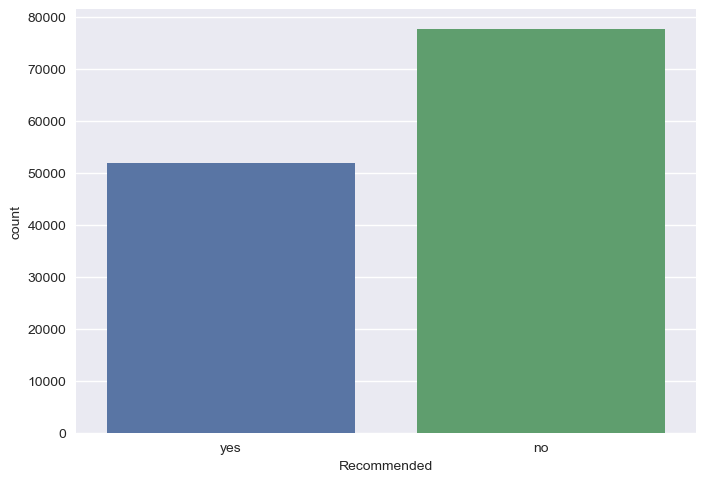

In [64]:
sns.countplot(x=df['Recommended'])
plt.show();

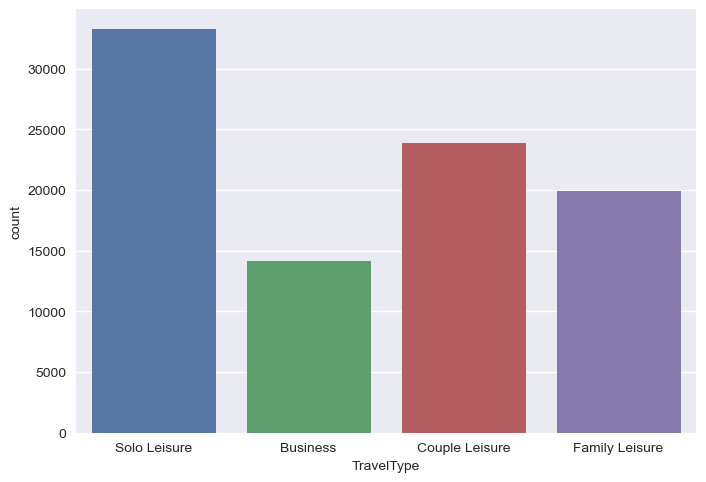

In [65]:
sns.countplot(x=df['TravelType'])
plt.show();

In [66]:
traveller = df.groupby('TravelType').sum().reset_index()
traveller

C:\Users\jayas\AppData\Local\Temp\ipykernel_17624\1591234391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traveller = df.groupby('TravelType').sum().reset_index()


,TravelType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,MonthYearPublished
0,Business,21554,28290,33612,56667.0,36157,39339,34508,9994,2857035932
1,Couple Leisure,33067,42248,53782,89378.0,55840,61908,56669,14156,4813322314
2,Family Leisure,27248,33692,42979,71183.0,45316,49477,45555,13501,4017625190
3,Solo Leisure,50209,66624,83097,145635.0,86385,94592,88201,21112,6711147418


C:\Users\jayas\AppData\Local\Temp\ipykernel_17624\4165893507.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


array([[<Axes: title={'center': 'DateFlown'}>,
        <Axes: title={'center': 'DatePub'}>,
        <Axes: title={'center': 'EntertainmentRating'}>],
       [<Axes: title={'center': 'FoodRating'}>,
        <Axes: title={'center': 'GroundServiceRating'}>,
        <Axes: title={'center': 'OverallScore'}>],
       [<Axes: title={'center': 'SeatComfortRating'}>,
        <Axes: title={'center': 'ServiceRating'}>,
        <Axes: title={'center': 'ValueRating'}>],
       [<Axes: title={'center': 'WifiRating'}>,
        <Axes: title={'center': 'MonthYearPublished'}>, <Axes: >]],
      dtype=object)

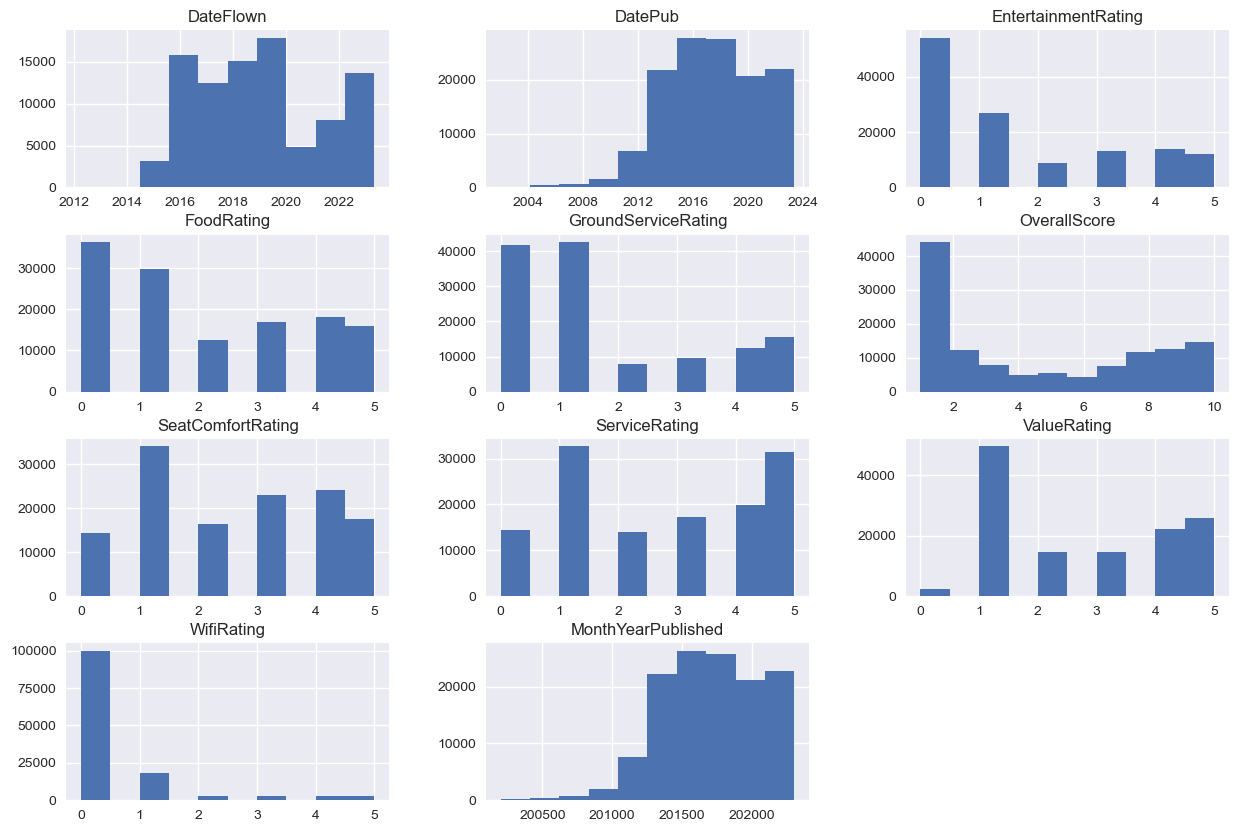

In [67]:
plt.style.use("seaborn")
df.hist(figsize=(15,10), bins=10)

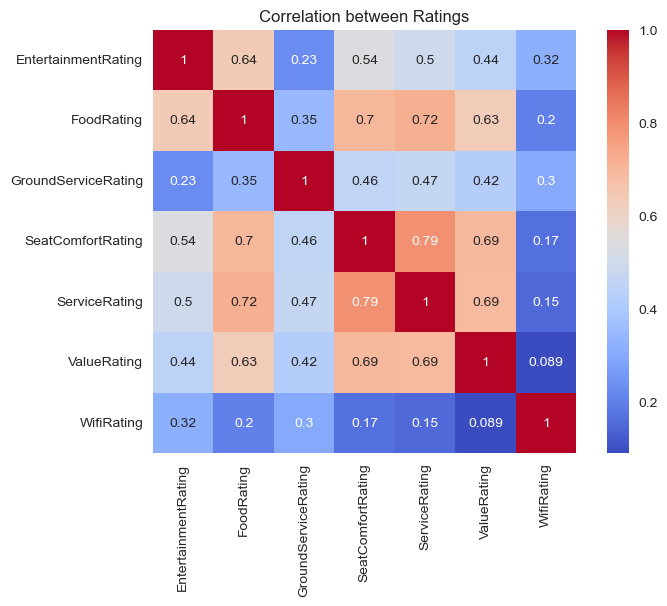

In [50]:
rating_cols = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
               'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']

corr_matrix = df[rating_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Ratings')
plt.show()

In [61]:
# Let's get the correlation matrix and save to variable 'corr_mat'
rating_columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'OverallScore', 'Recommended',
               'SeatComfortRating', 'ServiceRating', 'TripVerified','ValueRating', 'WifiRating']
corr_mat = df[rating_columns].corr()

# Display corr_mat
corr_mat

C:\Users\jayas\AppData\Local\Temp\ipykernel_24236\158206154.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df[rating_columns].corr()


,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
EntertainmentRating,1.000000,0.638200,0.225518,0.436858,0.535850,0.496589,0.442844,0.315255
FoodRating,0.638200,1.000000,0.348513,0.638269,0.699036,0.721933,0.632595,0.200392
GroundServiceRating,0.225518,0.348513,1.000000,0.407217,0.455215,0.468414,0.422748,0.302235
OverallScore,0.436858,0.638269,0.407217,1.000000,0.676455,0.686480,0.884072,0.074971
SeatComfortRating,0.535850,0.699036,0.455215,0.676455,1.000000,0.792707,0.692682,0.166415
ServiceRating,0.496589,0.721933,0.468414,0.686480,0.792707,1.000000,0.688846,0.152936
ValueRating,0.442844,0.632595,0.422748,0.884072,0.692682,0.688846,1.000000,0.089246
WifiRating,0.315255,0.200392,0.302235,0.074971,0.166415,0.152936,0.089246,1.000000


C:\Users\jayas\AppData\Local\Temp\ipykernel_24236\3011521391.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))


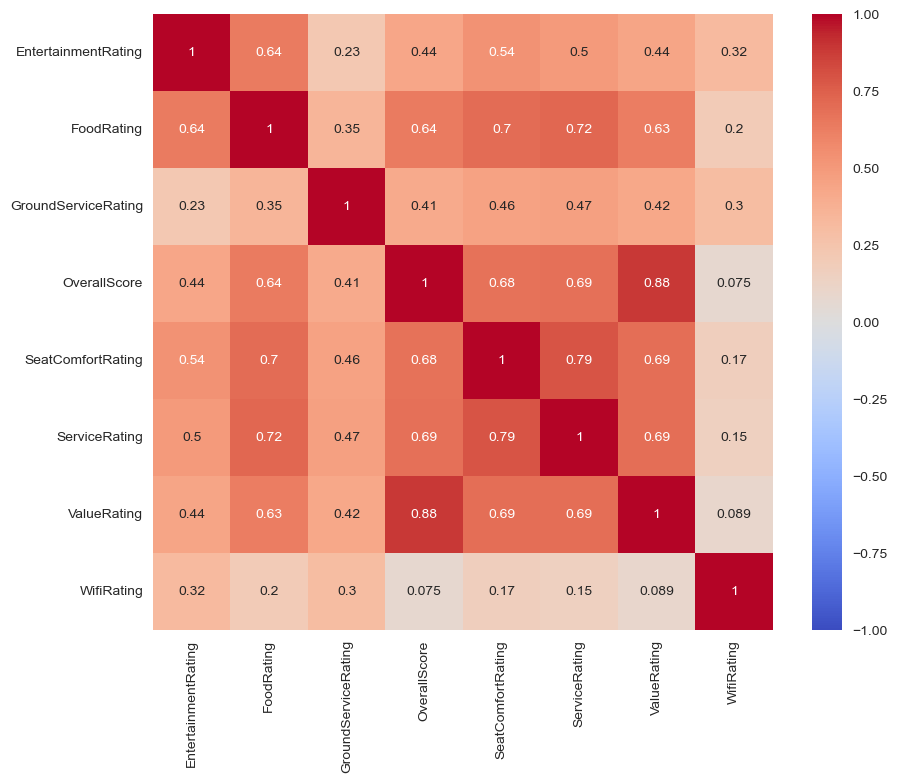

In [66]:
##Now using the correlation matrix, we can create a heatmap. 
##By displaying the correlation coefficients as colors, we can quickly identify variables that are positively or negatively 
##correlated. Here we will create a masked heatmap, instead of a full one, to enhance the readability

# creating a mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create a heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,  cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
#The heatmap reveals several strong correlations among the variables in the dataset

#Customer satisfaction is closely tied to the OverallScore and ValueRating, 
#highlighting the importance of delivering a positive overall experience and value for money.

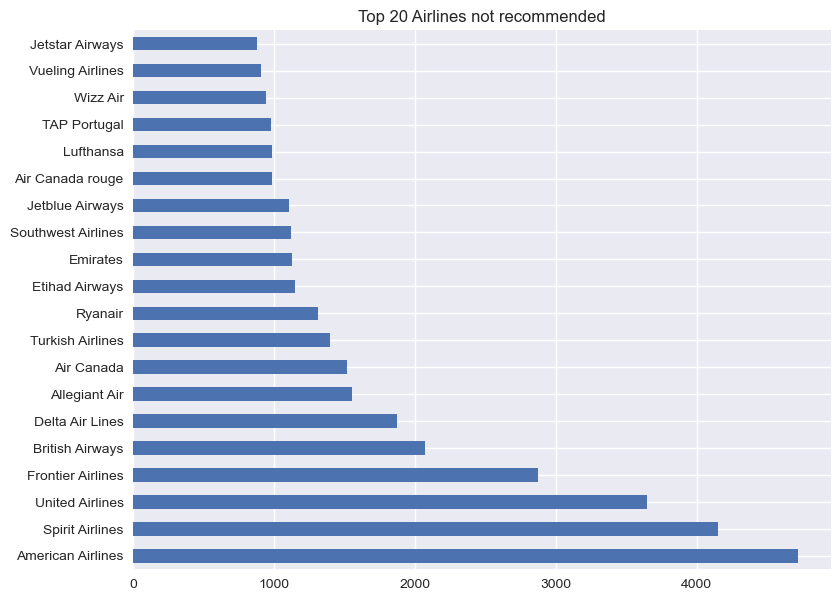

In [67]:
df.loc[df['Recommended']=='no']['AirlineName'].value_counts().nlargest(20).plot(kind='barh', figsize=(9,7))
plt.title('Top 20 Airlines not recommended')
plt.show();

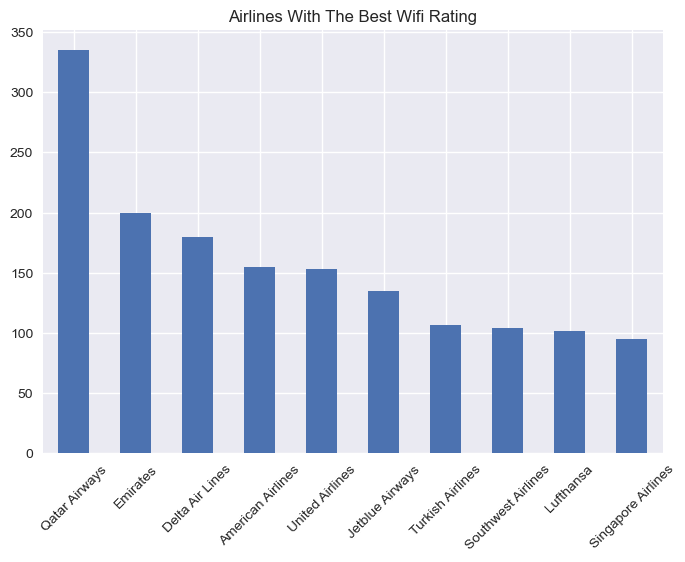

In [68]:
df.loc[df['WifiRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Wifi Rating')
plt.xticks(rotation=45)
plt.show()

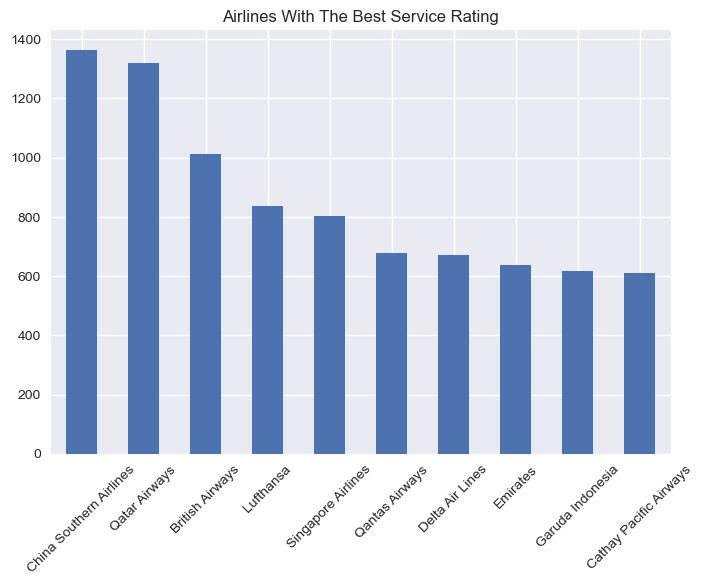

In [69]:
df.loc[df['ServiceRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Service Rating')
plt.xticks(rotation=45)
plt.show()

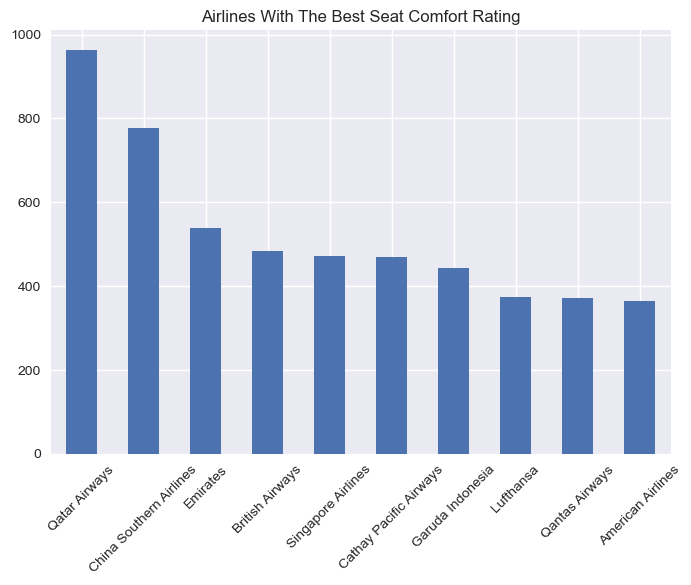

In [70]:
df.loc[df['SeatComfortRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Seat Comfort Rating')
plt.xticks(rotation=45)
plt.show()

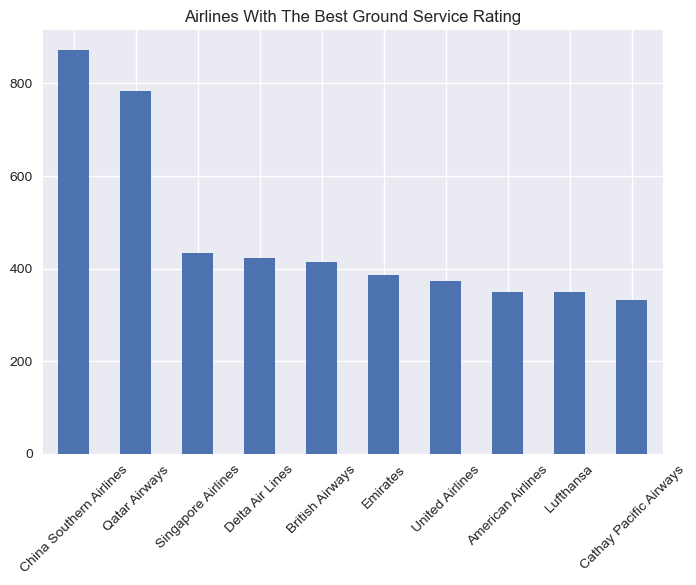

In [71]:
df.loc[df['GroundServiceRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Ground Service Rating')
plt.xticks(rotation=45)
plt.show()

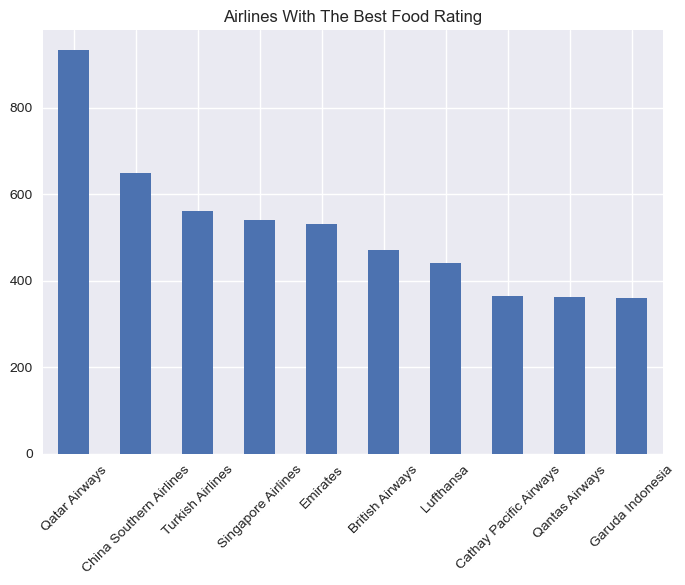

In [72]:
df.loc[df['FoodRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Food Rating')
plt.xticks(rotation=45)
plt.show()

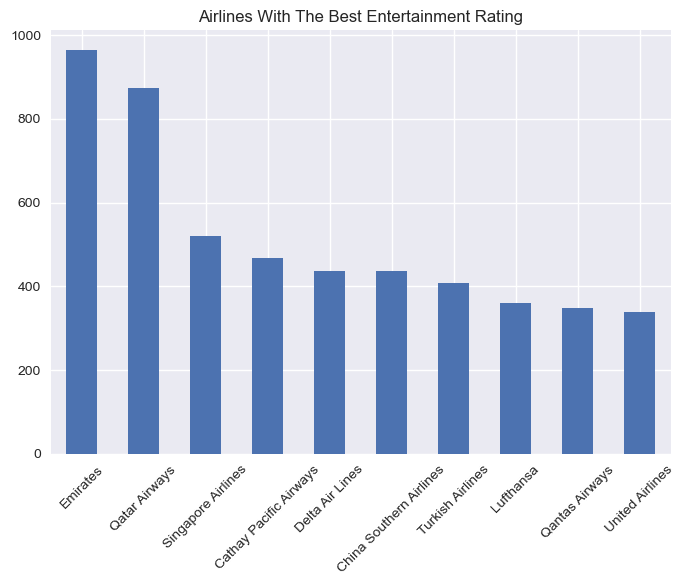

In [73]:
df.loc[df['EntertainmentRating']==5]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Entertainment Rating')
plt.xticks(rotation=45)
plt.show()

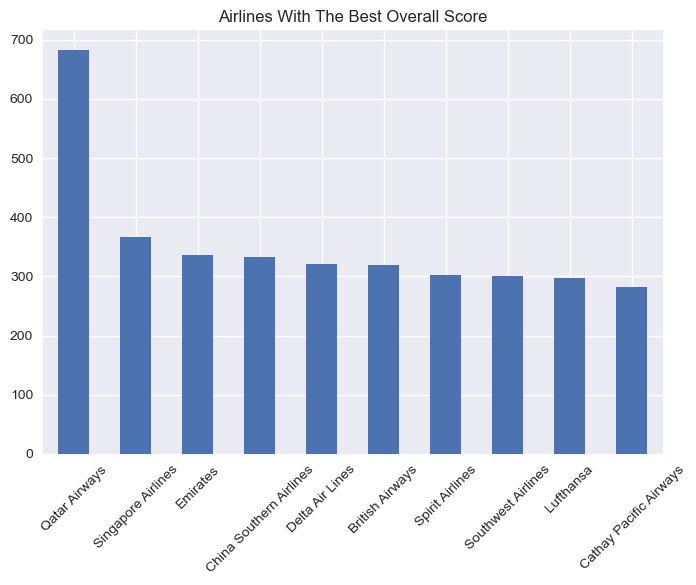

In [74]:
df.loc[df['OverallScore']==10.0]['AirlineName'].value_counts().nlargest(10).plot.bar(title='Airlines With The Best Overall Score')
plt.xticks(rotation=45)
plt.show()